In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\krist\OneDrive\Desktop\CareerFoundry\Data Immersion\Achievement 6\01-02-25 Airbnb Amsterdam'

In [4]:
df_listings=pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data',  'listings_cleaned.csv'))

In [5]:
df_listings.columns

Index(['Unnamed: 0', 'listings_id', 'name', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price_per_night', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df_listings.shape

(20030, 16)

In [7]:
df_listings.isnull().any()

Unnamed: 0                        False
listings_id                       False
name                               True
host_id                           False
host_name                         False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price_per_night                   False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [8]:
df_listings['name'].fillna('Unknown', inplace=True)

C:\Users\krist\AppData\Local\Temp\ipykernel_25216\2346905330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings['name'].fillna('Unknown', inplace=True)


In [9]:
df_listings = df_listings.drop(columns = ['Unnamed: 0'])

In [10]:
df_listings.head()

,listings_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_per_night,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


C:\Users\krist\AppData\Local\Temp\ipykernel_25216\2868138892.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_listings['price_per_night'], bins = 25)


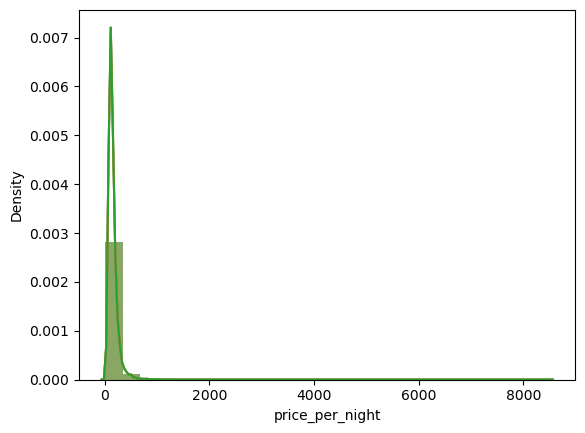

In [15]:
#Cheking for extreme values
sns.distplot(df_listings['price_per_night'], bins = 25)
plt.show()

In [16]:
df_listings['price_per_night'].min()

0

In [17]:
df_listings['price_per_night'].mean()

152.18117823265104

In [18]:
df_listings['price_per_night'].median()

125.0

In [19]:
df_listings['price_per_night'].max()

8500

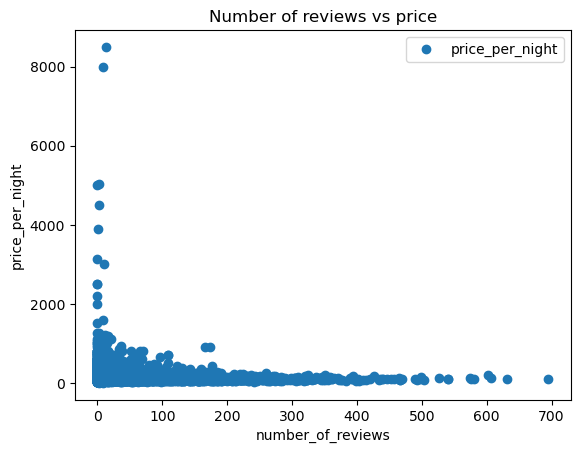

In [20]:
df_listings.plot(x = 'number_of_reviews', y  = 'price_per_night', style = 'o')
plt.title('Number of reviews vs price')
plt.xlabel('number_of_reviews')
plt.ylabel('price_per_night')
plt.show()

As the number of reviews increases, the price per night tends to decrease or remain stable, suggesting that highly-reviewed properties may be more affordable or fall within a standard price range. Additionally, a small number of listings with very high prices appear to have significantly fewer reviews.








In [23]:
X = df_listings['number_of_reviews'].values.reshape(-1,1)
Y = df_listings['price_per_night'].values.reshape(-1,1)

In [26]:
for row in X:
    print(row)


[248]
[42]
[233]
[1]
[171]
[434]
[215]
[383]
[32]
[76]
[426]
[61]
[176]
[31]
[79]
[3]
[167]
[159]
[98]
[12]
[91]
[213]
[152]
[81]
[333]
[261]
[219]
[120]
[3]
[53]
[150]
[88]
[1]
[420]
[145]
[82]
[21]
[0]
[92]
[26]
[83]
[9]
[574]
[527]
[131]
[58]
[82]
[10]
[178]
[246]
[39]
[115]
[158]
[695]
[116]
[403]
[68]
[29]
[120]
[141]
[46]
[29]
[74]
[3]
[106]
[309]
[490]
[138]
[38]
[29]
[87]
[82]
[23]
[3]
[52]
[580]
[26]
[46]
[37]
[204]
[18]
[47]
[102]
[45]
[99]
[27]
[158]
[318]
[130]
[88]
[9]
[497]
[37]
[42]
[33]
[64]
[25]
[15]
[2]
[13]
[39]
[150]
[14]
[1]
[187]
[104]
[82]
[16]
[2]
[107]
[17]
[540]
[56]
[289]
[37]
[97]
[13]
[47]
[358]
[77]
[65]
[42]
[88]
[2]
[60]
[4]
[6]
[8]
[26]
[38]
[14]
[103]
[4]
[1]
[20]
[4]
[173]
[9]
[6]
[37]
[22]
[20]
[141]
[3]
[97]
[30]
[16]
[245]
[177]
[283]
[8]
[187]
[23]
[5]
[166]
[14]
[4]
[83]
[9]
[83]
[14]
[79]
[3]
[121]
[11]
[6]
[87]
[25]
[61]
[28]
[72]
[53]
[9]
[48]
[34]
[9]
[46]
[215]
[32]
[24]
[36]
[23]
[102]
[34]
[226]
[298]
[38]
[50]
[81]
[3]
[160]
[16]
[70]
[10

In [27]:
for row in Y:
    print(row)


[59]
[160]
[80]
[125]
[150]
[65]
[75]
[55]
[219]
[180]
[159]
[100]
[250]
[200]
[155]
[150]
[140]
[350]
[225]
[120]
[125]
[115]
[90]
[72]
[87]
[75]
[60]
[86]
[250]
[159]
[60]
[149]
[112]
[100]
[125]
[225]
[109]
[750]
[145]
[450]
[179]
[100]
[109]
[109]
[116]
[220]
[175]
[260]
[105]
[70]
[135]
[180]
[115]
[95]
[249]
[45]
[100]
[189]
[75]
[40]
[115]
[150]
[100]
[100]
[165]
[94]
[87]
[99]
[100]
[80]
[259]
[98]
[35]
[52]
[100]
[89]
[695]
[145]
[74]
[120]
[220]
[145]
[120]
[89]
[100]
[230]
[230]
[50]
[160]
[110]
[150]
[95]
[100]
[99]
[79]
[80]
[284]
[99]
[99]
[180]
[129]
[114]
[150]
[265]
[170]
[100]
[165]
[125]
[175]
[100]
[80]
[86]
[400]
[119]
[120]
[70]
[449]
[175]
[149]
[193]
[145]
[250]
[115]
[188]
[150]
[100]
[168]
[8000]
[99]
[225]
[73]
[96]
[190]
[100]
[85]
[125]
[900]
[110]
[120]
[125]
[169]
[125]
[74]
[115]
[650]
[105]
[115]
[150]
[90]
[150]
[95]
[89]
[105]
[74]
[900]
[175]
[164]
[117]
[45]
[125]
[126]
[155]
[550]
[295]
[195]
[130]
[464]
[90]
[135]
[169]
[200]
[100]
[115]
[124]
[11

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [30]:
regression = LinearRegression()

In [31]:
regression.fit(X_train, Y_train)

LinearRegression()

In [32]:
Y_predicted = regression.predict(X_test)

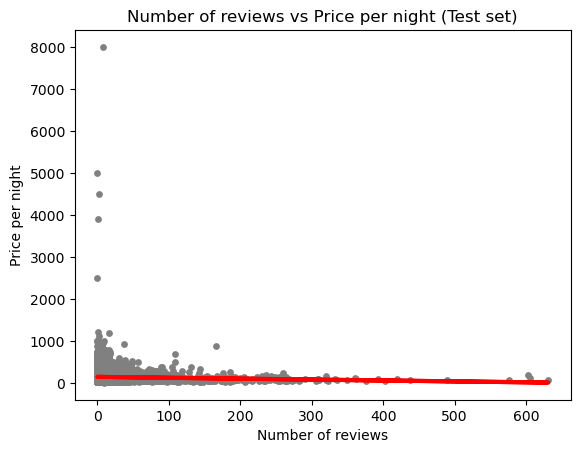

In [34]:
plot_test = plt
plot_test.scatter(X_test, Y_test, color='gray', s = 15)
plot_test.plot(X_test, Y_predicted, color='red', linewidth =3)
plot_test.title('Number of reviews vs Price per night (Test set)')
plot_test.xlabel('Number of reviews')
plot_test.ylabel('Price per night')
plot_test.show()

The red line appears to have a poor fit for the data, as it does not capture the significant variance in "Price per night" across different numbers of reviews. The majority of data points are spread widely above and below the line, suggesting the model does not effectively represent the relationship between the variables.

In [35]:
rmse = mean_squared_error(Y_test, Y_predicted) # This is the mean squared error
r2 = r2_score(Y_test, Y_predicted)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.214637]]
Mean squared error:  29685.357134602455
R2 score:  0.0036798870537325667


The slope of -0.2146 indicates a very slight negative relationship between the number of reviews and the price per night, suggesting that as the number of reviews increases, the price decreases marginally. However, the mean squared error (MSE) of 29,685 is quite large, indicating that the model's predictions deviate significantly from the actual prices. The R² score of 0.0037 is very close to zero, meaning the model explains almost none of the variance in the data and performs poorly in capturing the relationship between the variables.

In [37]:
Y_predicted

array([[154.29912847],
       [154.51376547],
       [135.62570925],
       ...,
       [155.80158748],
       [143.35264134],
       [150.43566242]])

In [38]:
data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,150,154.299128
1,140,154.513765
2,150,135.625709
3,80,146.142922
4,130,155.157676
5,105,150.435662
6,50,156.016224
7,100,154.299128
8,115,127.254866
9,89,155.801587


The model performed poorly on the test set, as the red line does not capture the variability in the data and fails to fit most of the points. Possible data bias, such as an overrepresentation of low-priced listings or skewed distributions, could have impacted the model's ability to generalize effectively.